#Recommendation Algorithm (question / description)


##Recommendation based on 5 questions

##Comparatif Table
<table border="1">
    <thead>
        <tr>
            <th>Caractéristique</th>
            <th>Similarité Cosinus</th>
            <th>KNN (K-Nearest Neighbors)</th>
            <th>SVD (Singular Value Decomposition)</th>
            <th>RNN (Recurrent Neural Network)</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Approche</td>
            <td>Mesure le cosinus de l'angle entre deux vecteurs, généralement utilisé pour les calculs de similarité et de distance.</td>
            <td>Classifie en fonction des k plus proches voisins dans l'espace des caractéristiques.</td>
            <td>Factorise la matrice en vecteurs et valeurs singuliers pour réduire la dimensionnalité et capturer les caractéristiques latentes.</td>
            <td>Utilise des données séquentielles et des connexions récurrentes pour capturer les dépendances au fil du temps.</td>
        </tr>
        <tr>
            <td>Entraînement</td>
            <td>Aucun entraînement requis, calcule simplement les similarités entre les vecteurs.</td>
            <td>Nécessite un entraînement pour stocker des points de données étiquetés pour des comparaisons futures.</td>
            <td>Nécessite la décomposition de la matrice, généralement à l'aide d'algorithmes comme TruncatedSVD.</td>
            <td>Nécessite un entraînement intensif avec des données séquentielles étiquetées pour apprendre des motifs et des dépendances.</td>
        </tr>
        <tr>
            <td>Exigences en données</td>
            <td>Faibles, peut fonctionner avec de petites quantités de données pour les mesures de similarité.</td>
            <td>Moyennes, nécessite des données étiquetées suffisantes pour trouver des voisins significatifs.</td>
            <td>Élevées, nécessite une grande quantité de données pour capturer efficacement les structures latentes.</td>
            <td>Élevées, nécessite un grand ensemble de données séquentielles pour un entraînement efficace.</td>
        </tr>
        <tr>
            <td>Performance</td>
            <td>Bonne pour les tâches nécessitant des mesures de similarité, mais peut avoir des difficultés avec une grande dimensionnalité.</td>
            <td>Bonne pour les données de faible à moyenne dimensionnalité, mais peut avoir des difficultés avec une grande dimensionnalité.</td>
            <td>Excellente pour capturer les structures latentes et réduire la dimensionnalité, améliorant les performances sur des tâches complexes.</td>
            <td>Excellente pour les données séquentielles, capturant les dépendances temporelles et les motifs complexes.</td>
        </tr>
        <tr>
            <td>Complexité</td>
            <td>Faible, simple à mettre en œuvre et à calculer les similarités.</td>
            <td>Moyenne, nécessite un ajustement des paramètres (valeur de k) et la sélection de la métrique de distance.</td>
            <td>Élevée, implique une factorisation matricielle complexe et intensément calculée.</td>
            <td>Très élevée, implique des architectures de réseaux complexes et un entraînement intensif.</td>
        </tr>
        <tr>
            <td>Latence</td>
            <td>Faible, calcul rapide des similarités cosinus.</td>
            <td>Variable, dépend du nombre de voisins et de la dimensionnalité des données.</td>
            <td>Modérée à élevée, en fonction de la taille des matrices impliquées.</td>
            <td>Variable, dépend de la taille et de la complexité du réseau, mais généralement élevée en raison de la nature récurrente.</td>
        </tr>
        <tr>
            <td>Cas d'utilisation</td>
            <td>Idéal pour les recherches de similarité rapide et les tâches de recommandation avec une faible dimensionnalité.</td>
            <td>Adapté pour la classification et la recommandation avec des ensembles de données de petite à moyenne taille.</td>
            <td>Excellent pour la réduction de la dimensionnalité et l'extraction de caractéristiques latentes dans les systèmes de recommandation.</td>
            <td>Le meilleur pour les tâches de recommandation séquentielles et l'analyse des données temporelles.</td>
        </tr>
    </tbody>
</table>


# Cousine Similarity

In the context of recommendation systems or information retrieval, cosine similarity is commonly used to assess the similarity between two documents or items. Each document or item is represented as a vector, where each dimension corresponds to a feature or attribute.

Processed CSV file and saved the results to output.csv.
What emotions or feelings would you like shown in your gift?
1. Love and romance
2. Happiness and joy
3. Peace and tranquility
4. Inspiration and motivation
5. Sentimental and nostalgic
Choose one option (1-5): 2
What is the occasion/event you need a gift for?
1. Birthday
2. Anniversary
3. Housewarming
4. Holiday celebration
5. Other
Choose one option (1-5): 2
Could you please tell me about the hobbies and interests of the receiver?
1. Animals
2. Nature
3. Inspiring quotes
4. Art/Design
5. Constructions
6. Zodiac
7. Other
Choose one option (1-7): 1
Is the gift targeted for:
1. Child Audience
2. Teen Audience
3. Adult Audience
4. Senior Audience
Choose one option (1-4): 1
How would you describe your personal style and aesthetic preferences?
1. Casual and laid-back
2. Elegant and sophisticated
3. Edgy and avant-garde
4. Bohemian and free-spirited
5. Classic and timeless
Choose one option (1-5): 2
Recommended products for you:
      

<ipython-input-17-39cdd6f42a9d>:161: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


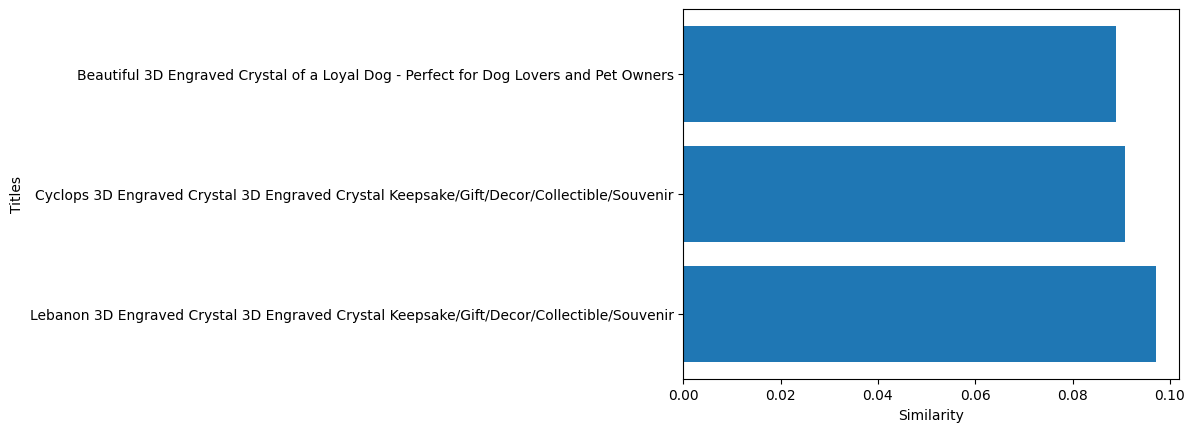

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import csv
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns


#optimise product descriptions
def process_csv(file_path):
    categories = [
        "Architecture", "Cars & Vehicules", "Religious", "Fiction", "Tools",
        "Human Organes", "Symbols", "Astronomy", "Plants", "Animals", "Art",
        "Celebrities", "Flags", "HALLOWEEN", "Quotes", "Sports", "Thanksgiving",
        "Maps", "Romance", "Kitchen", "Musical Instruments", "Black Lives Matter",
        "Cannabis", "Vegan", "Birds", "Dinosaurs", "rock and roll", "Firearms",
        "Dances", "Sailing", "Jazz", "Christmas", "Greek Methology", "Life Style",
        "Planes", "Vintage", "Alphabets", "Weapons", "Insects", "Games", "JEWELRY",
        "Science", "Travel", "Cats"
    ]

    with open(file_path, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        fieldnames = reader.fieldnames + ['Description']
        rows = []

        for row in reader:
            new_description = ""
            for category in categories:
                if category.lower() in row['Tags'].lower():
                    new_description += f" {category} 3D Engraved Crystal"
            row['Description'] = new_description + " " + row['Description']
            rows.append(row)

        # Output the modified data to a new CSV file
        output_file = 'output.csv'
        with open(output_file, 'w', newline='') as outfile:
            writer = csv.DictWriter(outfile, fieldnames=fieldnames)
            writer.writeheader()
            writer.writerows(rows)

        print(f"Processed CSV file and saved the results to {output_file}.")

# actual file path
process_csv('shopify.csv')

# Load data from CSV
data = pd.read_csv("output.csv")
data["Description"] = data["Description"].astype(str)

#pre-process data
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]*>', '', text)
    # Remove HTML entities
    text = re.sub(r'&[^;]*;', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

data["preprocessed_description"] = data["Description"].apply(preprocess_text)
#data["preprocessed_title"] = data["Title"].apply(preprocess_text)
data["preprocessed_text"] = data["preprocessed_description"] + '' + data['Tags']

#Dropping the rows with NaN values:
data.dropna(subset=['preprocessed_text'], inplace=True)
#####

# Function to display options and get the user's choice
def get_user_choice(question, options):
    print(question)
    for i, option in enumerate(options, start=1):
        print(f"{i}. {option}")
    while True:
        choice = input(f"Choose one option (1-{len(options)}): ")
        if choice.isdigit() and 1 <= int(choice) <= len(options):
            if options[int(choice) - 1] == "Other":
                other_value = input("Enter your own value: ")
                return other_value
            else:
                return options[int(choice) - 1]
        else:
            print("Invalid choice. Please enter a valid number.")

# Collect user answers to the 5 questions
questions = {
    "emotions": "What emotions or feelings would you like shown in your gift?",
    "occasion": "What is the occasion/event you need a gift for?",
    "interests": "Could you please tell me about the hobbies and interests of the receiver?",
    "audience": "Is the gift targeted for:",
    "Personality": "How would you describe your personal style and aesthetic preferences?"
}

answers = {}

for key, question in questions.items():
    options = []  # Define the options for each question
    if key == "emotions":
        options = ["Love and romance", "Happiness and joy", "Peace and tranquility",
                   "Inspiration and motivation", "Sentimental and nostalgic"]
    elif key == "occasion":
        options = ["Birthday", "Anniversary", "Housewarming", "Holiday celebration", "Other"]
    elif key == "interests":
        options = ["Animals", "Nature", "Inspiring quotes", "Art/Design", "Constructions", "Zodiac", "Other"]
    elif key == "audience":
        options = ["Child Audience", "Teen Audience", "Adult Audience", "Senior Audience"]
    elif key == "Personality":
        options = ["Casual and laid-back", "Elegant and sophisticated", "Edgy and avant-garde",
                   "Bohemian and free-spirited", "Classic and timeless"]

    answer = get_user_choice(question, options)
    answers[key] = answer

# Preprocess user answers
preprocessed_answers = preprocess_text(" ".join(answers.values()))

# Create TF-IDF matrix
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data["preprocessed_text"])

# Calculate similarity with user answers (cosine similarity)
answers_vector = vectorizer.transform([preprocessed_answers])
similarities = cosine_similarity(answers_vector, tfidf_matrix)
top_indices = similarities.argsort()[0][-3:][::-1]  # Get top 3 indices

# Rank and display recommended products
recommended_products = data.iloc[top_indices]
print("Recommended products for you:")
print(recommended_products[["Title"]])

# Get the similarity values
similarity_values = similarities[0][top_indices]

# Reverse the order of similarity values
similarity_values = similarity_values[::-1]

# Create a figure and axis
fig, ax = plt.subplots()

# Plot thesimilarity values
y_pos = range(len(similarity_values))
ax.barh(y_pos, similarity_values)

# Customize the plot
ax.set_xlabel("Similarity")
ax.set_ylabel("Titles")
ax.set_yticks(y_pos)
ax.set_yticklabels(recommended_products["Title"])

# Invert the y-axis
ax.invert_yaxis()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

* This code collects user answers, preprocesses them, calculates the similarity with the product descriptions using TF-IDF, ranks the products based on similarity, and displays the recommended products along with a plot showing the similarity values. <br>
* I modify the code to calculate the similarity between user answers and both the titles and descriptions of the products

## KNN

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import csv
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
import seaborn as sns


#optimise product descriptions

# Load data from CSV
data = pd.read_csv("output.csv")
data["Description"] = data["Description"].astype(str)

#pre-process data
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]*>', '', text)
    # Remove HTML entities
    text = re.sub(r'&[^;]*;', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

data["preprocessed_description"] = data["Description"].apply(preprocess_text)
#data["preprocessed_title"] = data["Title"].apply(preprocess_text)
data["preprocessed_text"] = data["preprocessed_description"] + '' + data['Tags']

#Dropping the rows with NaN values:
data.dropna(subset=['preprocessed_text'], inplace=True)
#####

# Function to display options and get the user's choice
def get_user_choice(question, options):
    print(question)
    for i, option in enumerate(options, start=1):
        print(f"{i}. {option}")
    while True:
        choice = input(f"Choose one option (1-{len(options)}): ")
        if choice.isdigit() and 1 <= int(choice) <= len(options):
            if options[int(choice) - 1] == "Other":
                other_value = input("Enter your own value: ")
                return other_value
            else:
                return options[int(choice) - 1]
        else:
            print("Invalid choice. Please enter a valid number.")

# Collect user answers to the 5 questions
questions = {
    "emotions": "What emotions or feelings would you like shown in your gift?",
    "occasion": "What is the occasion/event you need a gift for?",
    "interests": "Could you please tell me about the hobbies and interests of the receiver?",
    "audience": "Is the gift targeted for:",
    "Personality": "How would you describe your personal style and aesthetic preferences?"
}

answers = {}

for key, question in questions.items():
    options = []  # Define the options for each question
    if key == "emotions":
        options = ["Love and romance", "Happiness and joy", "Peace and tranquility",
                   "Inspiration and motivation", "Sentimental and nostalgic"]
    elif key == "occasion":
        options = ["Birthday", "Anniversary", "Housewarming", "Holiday celebration", "Other"]
    elif key == "interests":
        options = ["Animals", "Nature", "Inspiring quotes", "Art/Design", "Architecture", "Zodiac", "Other"]
    elif key == "audience":
        options = ["Child Audience", "Teen Audience", "Adult Audience", "Senior Audience"]
    elif key == "Personality":
        options = ["Casual and laid-back", "Elegant and sophisticated", "Edgy and avant-garde",
                   "Bohemian and free-spirited", "Classic and timeless"]

    answer = get_user_choice(question, options)
    answers[key] = answer


# Preprocess user answers
preprocessed_answers = preprocess_text(" ".join(answers.values()))
print(preprocessed_answers)
# Preprocess the descriptions for KNN
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data["preprocessed_text"])

# Perform KNN
k = 3  # number of nearest neighbors to retrieve
knn = NearestNeighbors(n_neighbors=k)
knn.fit(X)

# Transform user answers into feature vector
answer_vector = vectorizer.transform([preprocessed_answers])

# Find the nearest neighbors
distances, indices = knn.kneighbors(answer_vector)

# Get the indices of the top recommendations
top_indices = indices[0]

# Get the product IDs of the top recommendations
top_product_ids = data.iloc[top_indices]["Variant ID"].tolist()

# Get the product titles of the top recommendations
top_product_titles = data.iloc[top_indices]["Title"].tolist()

# Display top recommendations
for product_id, product_title in zip(top_product_ids, top_product_titles):
    print(f"Product ID: {product_id}, Product Title: {product_title}")

##Singular Value Decomposition (SVD) - Matrix Factorization

In [ ]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load data from CSV
data = pd.read_csv("output.csv")
data["Description"] = data["Description"].astype(str)

# Preprocess user answers
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]*>', '', text)
    # Remove HTML entities
    text = re.sub(r'&[^;]*;', '', text)
    # Convert to lowercase
    text = text.lower()
    return text


data["preprocessed_description"] = data["Description"].apply(preprocess_text)
#data["preprocessed_title"] = data["Title"].apply(preprocess_text)
data["preprocessed_text"] = data["preprocessed_description"] + '' + data['Tags']

#Dropping the rows with NaN values:
data.dropna(subset=['preprocessed_text'], inplace=True)
#####

# Function to display options and get the user's choice
def get_user_choice(question, options):
    print(question)
    for i, option in enumerate(options, start=1):
        print(f"{i}. {option}")
    while True:
        choice = input(f"Choose one option (1-{len(options)}): ")
        if choice.isdigit() and 1 <= int(choice) <= len(options):
            if options[int(choice) - 1] == "Other":
                other_value = input("Enter your own value: ")
                return other_value
            else:
                return options[int(choice) - 1]
        else:
            print("Invalid choice. Please enter a valid number.")

# Collect user answers to the 5 questions
questions = {
    "emotions": "What emotions or feelings would you like shown in your gift?",
    "occasion": "What is the occasion/event you need a gift for?",
    "interests": "Could you please tell me about the hobbies and interests of the receiver?",
    "audience": "Is the gift targeted for:",
    "Personality": "How would you describe your personal style and aesthetic preferences?"
}

answers = {}

for key, question in questions.items():
    options = []  # Define the options for each question
    if key == "emotions":
        options = ["Love and romance", "Happiness and joy", "Peace and tranquility",
                   "Inspiration and motivation", "Sentimental and nostalgic"]
    elif key == "occasion":
        options = ["Birthday", "Anniversary", "Housewarming", "Holiday celebration", "Other"]
    elif key == "interests":
        options = ["Animals", "Nature", "Inspiring quotes", "Art/Design", "Architecture", "Zodiac", "Other"]
    elif key == "audience":
        options = ["Child Audience", "Teen Audience", "Adult Audience", "Senior Audience"]
    elif key == "Personality":
        options = ["Casual and laid-back", "Elegant and sophisticated", "Edgy and avant-garde",
                   "Bohemian and free-spirited", "Classic and timeless"]

    answer = get_user_choice(question, options)
    answers[key] = answer


# Preprocess user answers
preprocessed_answers = preprocess_text(" ".join(answers.values()))

# Create TF-IDF matrix
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data["preprocessed_text"])

# Apply SVD
k = 50  # Number of latent factors
svd = TruncatedSVD(n_components=k, random_state=42)
svd_matrix = svd.fit_transform(tfidf_matrix)

# Calculate cosine similarity between user answers and all products
user_answers_vector = vectorizer.transform([preprocessed_answers])
user_svd_vector = svd.transform(user_answers_vector)
similarities = cosine_similarity(user_svd_vector, svd_matrix)

# Get indices of top 3 similar products based on cosine similarity
top_3_indices = similarities.argsort()[0][-3:][::-1]

# Get the recommended products from the top 3 similar indices
recommended_products = data.iloc[top_3_indices]
print("Recommended products for you:")
print(recommended_products[["Title"]])

What emotions or feelings would you like shown in your gift?
1. Love and romance
2. Happiness and joy
3. Peace and tranquility
4. Inspiration and motivation
5. Sentimental and nostalgic
Choose one option (1-5): 2
What is the occasion/event you need a gift for?
1. Birthday
2. Anniversary
3. Housewarming
4. Holiday celebration
5. Other
Choose one option (1-5): 1
Could you please tell me about the hobbies and interests of the receiver?
1. Animals
2. Nature
3. Inspiring quotes
4. Art/Design
5. Architecture
6. Zodiac
7. Other
Choose one option (1-7): 5
Is the gift targeted for:
1. Child Audience
2. Teen Audience
3. Adult Audience
4. Senior Audience
Choose one option (1-4): 3
How would you describe your personal style and aesthetic preferences?
1. Casual and laid-back
2. Elegant and sophisticated
3. Edgy and avant-garde
4. Bohemian and free-spirited
5. Classic and timeless
Choose one option (1-5): 2
Recommended products for you:
                                                 Title
108  Hou

##RNN ALGORITHM

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Load data from CSV
data = pd.read_csv("output.csv")
data["Description"] = data["Description"].astype(str)

# Preprocess user answers
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]*>', '', text)
    # Remove HTML entities
    text = re.sub(r'&[^;]*;', '', text)
    # Convert to lowercase
    text = text.lower()
    return text


data["preprocessed_description"] = data["Description"].apply(preprocess_text)
#data["preprocessed_title"] = data["Title"].apply(preprocess_text)
data["preprocessed_text"] = data["preprocessed_description"] + '' + data['Tags']

#Dropping the rows with NaN values:
data.dropna(subset=['preprocessed_text'], inplace=True)
#####

# Function to display options and get the user's choice
def get_user_choice(question, options):
    print(question)
    for i, option in enumerate(options, start=1):
        print(f"{i}. {option}")
    while True:
        choice = input(f"Choose one option (1-{len(options)}): ")
        if choice.isdigit() and 1 <= int(choice) <= len(options):
            if options[int(choice) - 1] == "Other":
                other_value = input("Enter your own value: ")
                return other_value
            else:
                return options[int(choice) - 1]
        else:
            print("Invalid choice. Please enter a valid number.")

# Collect user answers to the 5 questions
questions = {
    "emotions": "What emotions or feelings would you like shown in your gift?",
    "occasion": "What is the occasion/event you need a gift for?",
    "interests": "Could you please tell me about the hobbies and interests of the receiver?",
    "audience": "Is the gift targeted for:",
    "Personality": "How would you describe your personal style and aesthetic preferences?"
}

answers = {}

for key, question in questions.items():
    options = []  # Define the options for each question
    if key == "emotions":
        options = ["Love and romance", "Happiness and joy", "Peace and tranquility",
                   "Inspiration and motivation", "Sentimental and nostalgic"]
    elif key == "occasion":
        options = ["Birthday", "Anniversary", "Housewarming", "Holiday celebration", "Other"]
    elif key == "interests":
        options = ["Animals", "Nature", "Inspiring quotes", "Art/Design", "Architecture", "Zodiac", "Other"]
    elif key == "audience":
        options = ["Child Audience", "Teen Audience", "Adult Audience", "Senior Audience"]
    elif key == "Personality":
        options = ["Casual and laid-back", "Elegant and sophisticated", "Edgy and avant-garde",
                   "Bohemian and free-spirited", "Classic and timeless"]

    answer = get_user_choice(question, options)
    answers[key] = answer

# Preprocess user answers
preprocessed_answers = preprocess_text(" ".join(answers.values()))

# Preprocess the descriptions for the CNN approach
data["text"] = data["preprocessed_description"]

# Create a tokenizer and fit it on preprocessed text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data["preprocessed_text"])

# Convert preprocessed text to sequences
sequences = tokenizer.texts_to_sequences(data["preprocessed_text"])

# Pad sequences
max_seq_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_seq_length)

# Split data into input (X) and target (y) sequences
X = padded_sequences[:, :-1]
y = padded_sequences[:, -1]

# Define and train the RNN model
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_seq_length - 1))
model.add(LSTM(hidden_units))
model.add(Dense(vocab_size, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, np.expand_dims(y, axis=-1), epochs=10, batch_size=32)  # Update labels shape

# Preprocess user answers and convert them to sequences
preprocessed_answers = preprocess_text(" ".join(answers.values()))
user_sequence = tokenizer.texts_to_sequences([preprocessed_answers])

# Pad the user sequence to match the expected input length
padded_user_sequence = pad_sequences(user_sequence, maxlen=max_seq_length - 1, padding='post')

# Generate recommendations using the trained RNN model
generated_sequence = model.predict(padded_user_sequence)

# Get the top N recommended words
N = 5  # Number of recommendations to generate
top_n_indices = np.argsort(generated_sequence[0])[-N:][::-1]

# Convert indices back to words
recommended_words = [tokenizer.index_word[idx] for idx in top_n_indices if idx in tokenizer.index_word]

# Find products that contain the recommended words
recommended_products = data[data['preprocessed_text'].apply(lambda x: any(word in x for word in recommended_words))]
#sort top 5 products
recommended_products = recommended_products.head(5)
print("Recommended products for you:")
print(recommended_products[["Title"]])

# If no products are found, you might want to implement a fallback strategy
if recommended_products.empty:
    print("No exact matches found. Here are some popular products:")
    recommended_products = data.sample(n=5)  # Randomly sample 5 products
    print(recommended_products[["Title"]])

What emotions or feelings would you like shown in your gift?
1. Love and romance
2. Happiness and joy
3. Peace and tranquility
4. Inspiration and motivation
5. Sentimental and nostalgic
Choose one option (1-5): 2
What is the occasion/event you need a gift for?
1. Birthday
2. Anniversary
3. Housewarming
4. Holiday celebration
5. Other
Choose one option (1-5): 2
Could you please tell me about the hobbies and interests of the receiver?
1. Animals
2. Nature
3. Inspiring quotes
4. Art/Design
5. Architecture
6. Zodiac
7. Other
Choose one option (1-7): 5
Is the gift targeted for:
1. Child Audience
2. Teen Audience
3. Adult Audience
4. Senior Audience
Choose one option (1-4): 3
How would you describe your personal style and aesthetic preferences?
1. Casual and laid-back
2. Elegant and sophisticated
3. Edgy and avant-garde
4. Bohemian and free-spirited
5. Classic and timeless
Choose one option (1-5): 2
Epoch 1/10
36/36 [==============================] - 36s 946ms/step - loss: 6.4126 - accuracy:

## One Questions Recommendation

Ask me a question about your gift occasion: just i want a birthday gift
Recommended products for you:
                                                 Title
129  Reusable Gift Bags - Eco-Friendly and Durable ...
42   Scorpio Zodiac Sign 3D Engraved Crystal Keepsa...
88   Aquarius Zodiac Sign 3D Engraved Crystal Keeps...


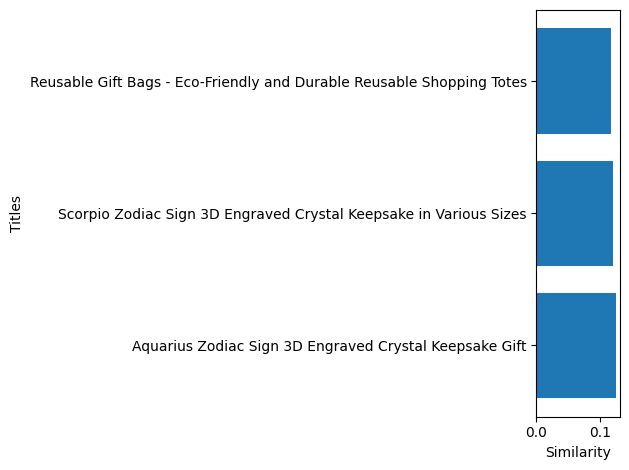

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
# Optional for NLP: import spacy

# Load data from CSV
data = pd.read_csv("shopify.csv")
data["Description"] = data["Description"].astype(str)

def preprocess_text(text):
    # Remove HTML tags
  text = re.sub(r'<[^>]*>', '', text)
  # Remove HTML entities
  text = re.sub(r'&[^;]*;', '', text)
  text = re.sub(r'<ul>', '', text)
  # Convert to lowercase
  text = text.lower()
  return text

data["preprocessed_description"] = data["Description"].apply(preprocess_text)

# Create TF-IDF matrix
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data["preprocessed_description"])

# Collect user question
user_question = input("Ask me a question about your gift occasion: ")

# Preprocess user question
preprocessed_question = preprocess_text(user_question)

# Calculate similarity with product descriptions (cosine similarity)
from sklearn.metrics.pairwise import cosine_similarity

question_vector = vectorizer.transform([preprocessed_question])
similarities = cosine_similarity(question_vector, tfidf_matrix)
top_indices = [min(index, similarities.shape[1] - 1) for index in top_indices]


# Rank and display recommended products
top_indices = similarities.argsort()[0][-3:][::-1]  # Get top 3 indices
recommended_products = data.iloc[top_indices]
print("Recommended products for you:")
print(recommended_products[["Title"]])

# Get the similarity values
similarity_values = similarities[0][top_indices]

# Reverse the order of similarity values
similarity_values = similarity_values[::-1]

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the similarity values
y_pos = range(len(similarity_values))
ax.barh(y_pos, similarity_values)

# Customize the plot
ax.set_xlabel("Similarity")
ax.set_ylabel("Titles")
ax.set_yticks(y_pos)
ax.set_yticklabels(recommended_products["Title"])

# Invert the y-axisV
ax.invert_yaxis()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

#Preprocess functions

delete empty rows

In [ ]:
import pandas as pd
def delete_empty_title_rows(csv_file):
    """
    Deletes rows from a CSV file that have an empty Title column.

    Args:
        csv_file (str): Path to the CSV file.

    Returns:
        None
    """

    try:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(csv_file)

        # Drop rows with empty Title column
        df.dropna(subset=['Title'], inplace=True)

        # Save the modified DataFrame back to the CSV file
        df.to_csv(csv_file, index=False)
        print(f"Successfully deleted rows with empty Title from {csv_file}.")
    except FileNotFoundError:
        print(f"Error: CSV file '{csv_file}' not found.")

# Example usage:
delete_empty_title_rows('shopify.csv')

Successfully deleted rows with empty Title from shopify.csv.


optimize products

In [ ]:
import csv
def process_csv(file_path):
    categories = [
        "Architecture", "Cars & Vehicules", "Religious", "Fiction", "Tools",
        "Human Organes", "Symbols", "Astronomy", "Plants", "Animals", "Art",
        "Celebrities", "Flags", "HALLOWEEN", "Quotes", "Sports", "Thanksgiving",
        "Maps", "Romance", "Kitchen", "Musical Instruments", "Black Lives Matter",
        "Cannabis", "Vegan", "Birds", "Dinosaurs", "rock and roll", "Firearms",
        "Dances", "Sailing", "Jazz", "Christmas", "Greek Methology", "Life Style",
        "Planes", "Vintage", "Alphabets", "Weapons", "Insects", "Games", "JEWELRY",
        "Science", "Travel", "Cats"
    ]

    with open(file_path, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        fieldnames = reader.fieldnames + ['Description']
        rows = []

        for row in reader:
            new_description = ""
            for category in categories:
                if category.lower() in row['Tags'].lower():
                    new_description += f" {category} 3D Engraved Crystal"
            row['Description'] = new_description + " " + row['Description']
            rows.append(row)

        # Output the modified data to a new CSV file
        output_file = 'output.csv'
        with open(output_file, 'w', newline='') as outfile:
            writer = csv.DictWriter(outfile, fieldnames=fieldnames)
            writer.writeheader()
            writer.writerows(rows)

        print(f"Processed CSV file and saved the results to {output_file}.")
process_csv("shopify.csv")

Processed CSV file and saved the results to output.csv.
